In [1]:
import sys, os

sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from project2.network import Network
import numpy as np
import matplotlib.pyplot as plt

from common.optimizer.adagrad import *
from common.optimizer.momentum import *
from common.optimizer.sgd import *


In [2]:
# 1. MNIST 데이터 로드
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
train_size = x_train.shape[0]

===========iteration:0===========
SGD:2.3022252564159738
Momentum:2.3033282567822453
AdaGrad:2.209041206668969
===========iteration:100===========
SGD:2.2922310191198196
Momentum:1.422797636478496
AdaGrad:0.365148629730848
===========iteration:200===========
SGD:2.273398281812284
Momentum:0.5833529818878606
AdaGrad:0.3648954439814796
===========iteration:300===========
SGD:2.225889049034934
Momentum:0.37557800498321703
AdaGrad:0.2528425276927312
===========iteration:400===========
SGD:2.1286958877620696
Momentum:0.34151708481963444
AdaGrad:0.2705726473293914
===========iteration:500===========
SGD:2.0439800886662995
Momentum:0.5440672917131744
AdaGrad:0.45274874889621136
===========iteration:600===========
SGD:1.741901811102934
Momentum:0.27048985698158
AdaGrad:0.19570293827254304
===========iteration:700===========
SGD:1.5051411162229997
Momentum:0.27643205308387775
AdaGrad:0.20117939654486588
===========iteration:800===========
SGD:1.2097369777021456
Momentum:0.25766522209481235
AdaG

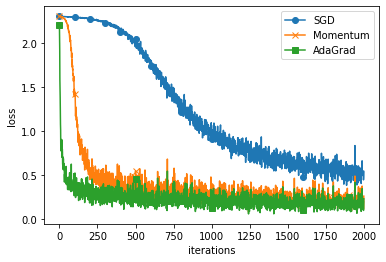

In [3]:

# 2. 각 네트워크, Optimizer 등 초기화
batch_size = 128
max_iterations = 2000

optimizers = {}
optimizers["SGD"] = SGD()
optimizers["Momentum"] = Momentum()
optimizers["AdaGrad"] = AdaGrad()

train_loss = {}
networks = {}
for key in optimizers.keys():
    networks[key] = Network(
        input_size=784,
        output_size=10,
        hidden_size_list=[100],
        activation_function="relu",
        weight_init_std=0.01,
    )
    train_loss[key] = []
    
    
# 3. Optiminzer의 학습 속도 비교
for i in range(max_iterations):

    # 매 반복마다 동일한 batch로 훈련하고 결과값 출력.
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 4. 결과 그래프 생성
markers =  {"SGD": "o", "Momentum": "x", "AdaGrad": "s"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(
        x, train_loss[key], marker=markers[key], markevery=100, label=key
    )
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()
plt.show()
